### 桔子还是橙子？

识别水果是机器学习中既简单又常见的应用。

观察桔子和橙子的外形发现：桔子果实较小，常为扁圆形，单果重量约45～135g，果皮橙红或朱红色；橙子果实较大，常为椭圆形，单果重量约115～225g，果皮橙黄色。

这个数据集包括两个属性：
* weight：重量，指的是单果重量
* g-color：颜色，主要看偏红还是偏黄，所以只看G-绿色分量

我们的最终目标是，根据参数值的特征，将水果分成两类。

第一步，读取数据：

In [1]:
# 导入读文件需要的包
import numpy as np

# 以逗号为分隔符，从CSV文件读取数据，并转化为数组
orange = np.loadtxt(open("orange.csv"), delimiter = ",") 

你可以把数据打印出来看看：

In [2]:
print(orange)

[[ 67.  80.]
 [ 72.  80.]
 [118.  80.]
 [ 76.  81.]
 [ 79.  81.]
 [124.  81.]
 [125.  81.]
 [ 66.  83.]
 [ 99.  83.]
 [103.  85.]
 [116.  85.]
 [120.  85.]
 [110.  86.]
 [124.  86.]
 [110.  87.]
 [ 54.  88.]
 [ 63.  88.]
 [ 65.  88.]
 [ 68.  88.]
 [ 94.  88.]
 [ 70.  89.]
 [ 83.  89.]
 [119.  91.]
 [122.  91.]
 [ 74.  92.]
 [117.  92.]
 [126.  92.]
 [130.  92.]
 [ 69.  93.]
 [ 90.  93.]
 [ 87.  94.]
 [118.  94.]
 [ 79.  95.]
 [ 96.  95.]
 [101.  95.]
 [ 94.  96.]
 [ 85.  97.]
 [ 99.  97.]
 [120.  97.]
 [123.  97.]
 [ 65.  98.]
 [ 93.  99.]
 [ 79. 100.]
 [ 85. 100.]
 [ 95. 100.]
 [113. 100.]
 [ 99. 101.]
 [101. 101.]
 [110. 101.]
 [ 65. 102.]
 [133. 102.]
 [126. 103.]
 [129. 103.]
 [134. 105.]
 [ 47. 106.]
 [106. 106.]
 [ 71. 107.]
 [123. 107.]
 [124. 107.]
 [ 59. 108.]
 [ 67. 108.]
 [120. 108.]
 [ 56. 109.]
 [ 92. 109.]
 [132. 109.]
 [ 94. 111.]
 [113. 111.]
 [ 68. 112.]
 [105. 113.]
 [128. 113.]
 [128. 113.]
 [128. 114.]
 [132. 114.]
 [ 62. 115.]
 [ 67. 115.]
 [ 89. 115.]
 [ 46. 116.]

第二步，处理数据并选择模型进行学习：

In [2]:
# 导入机器学习需要的模型，这里使用的是高斯混合模型
from sklearn.mixture import GaussianMixture

# 设置参数，初始化模型，参数表示将数据分为2类
model = GaussianMixture(n_components = 2)
# 训练模型
model.fit(orange)
# 预测类标签
predict = model.predict(orange)

预测结果也可以打印出来看看：

In [4]:
print(predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]


第三步，以图表形式查看结果：

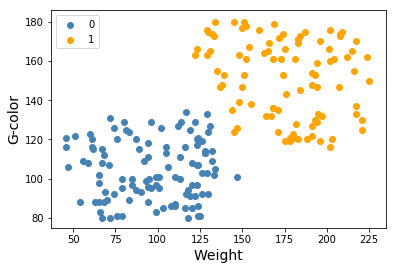

In [4]:
# 导入绘图需要的包
import matplotlib.pyplot as plt

# 将数据按类标签的值拆成2组
x0 = orange[predict == 0]
x1 = orange[predict == 1]
# 指定每一类数据的颜色和图例名称
plt.scatter(x0[:, 0], x0[:, 1], c = "steelblue", label = "0")
plt.scatter(x1[:, 0], x1[:, 1], c = "orange", label = "1")
# 设置坐标标签和文字大小
plt.xlabel("Weight", fontsize = 14)
plt.ylabel("G-color", fontsize = 14)
# 加上图例
plt.legend(loc = 2)
# 显示结果
plt.show()

观察图中的数据特征，结合两种水果的特征可以确定，蓝色图例"0"对应的数据是桔子，橙色图例"1"对应的数据是橙子。

最后，我们可以输入数据，让机器判断是桔子还是橙子：

In [5]:
# 接收输入，并存入数组
x,k = [],[]
k.append(float(input("单果重量：")))
k.append(int(input("绿色分量：")))
x.append(k)
# 用模型预测结果
y = model.predict(x)
# 输出预测的结果
print("桔子") if y == [0] else print("橙子")

单果重量：180
绿色分量：150
橙子
